## Sim Demo

### Imports

In [25]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [26]:
from imports import *

In [27]:
# overall imports
import importlib
import data

# importlib.reload(data.data_utils)
# importlib.reload(data.data_load)
# importlib.reload(sim.sim_utils)
# importlib.reload(sim)
# importlib.reload(models)

import models
import sim.sim
import sim.sim_utils
from sim.sim_utils import bytes2human, print_system_usage
from sim.sim import Simulation
from sim.sim_run import single_sim_run, open_pickled_results


#### Check job specs

In [28]:
print_system_usage()

total = psutil.disk_usage('/').total
print(bytes2human(total))

CPU Usage: 21.0%
RAM Usage: 12.2%
Available RAM: 1.3T
Total RAM: 1.5T
52.4G


In [29]:
print("XGBoost version:", xgboost.__version__)
print("cupy version:", cp.__version__)

XGBoost version: 2.0.3
cupy version: 13.1.0


In [30]:
GPUtil.getAvailable()
# if a number is seen a GPU is available

[0]

In [31]:
GPUtil.getGPUs()

DEVICE_ID_LIST = GPUtil.getFirstAvailable()
DEVICE_ID = DEVICE_ID_LIST[0] # grab first element from list
if DEVICE_ID != None:
    print('GPU found', DEVICE_ID)
    use_gpu = True

GPU found 0


In [32]:
GPUtil.showUtilization()


| ID | GPU | MEM |
------------------
|  0 |  0% |  7% |


In [33]:
torch.cuda.is_available()

# Clear GPU memory
if torch.cuda.is_available():
    torch.cuda.empty_cache()

In [34]:
print(torch.cuda.memory_allocated())
print(torch.cuda.max_memory_allocated())

781972992
7566317568


#### Simulation tests <a id="sims"></a>

Number of components for 95% variance PCA: 34
X shape: (114, 10760)
X_pca shape: (114, 34)
Y_sc shape: (114, 114)
Y_sc_spectralL shape: (114, 113)
Y_sc_spectralA shape: (114, 114)
Y_fc shape: (114, 114)
Coordinates shape: (114, 3)
Y shape (114, 114)
Network coverage: 100.0% of regions
Network sizes: [28, 28, 28, 30]
feature_name:  transcriptome
processing_type:  None
feature_name:  euclidean
processing_type:  None
features ['transcriptome', 'euclidean']
X shape (114, 10763)

 Test fold num: 1 X_train shape: (7310, 21526) Y_train shape: (7310,) X_test shape: (756, 21526) Y_test shape: (756,)
2
3
4
include_coords True
BEST CONFIG {'input_dim': 21526, 'include_coords': True, 'token_encoder_dim': 40, 'd_model': 64, 'use_positional_encoding': False, 'encoder_output_dim': 10, 'nhead': 4, 'num_layers': 4, 'deep_hidden_dims': [512, 256], 'transformer_dropout': 0.3, 'dropout_rate': 0.3, 'learning_rate': 0.0001, 'weight_decay': 0.0001, 'lambda_reg': 0, 'batch_size': 128, 'epochs': 200}
Epoch 5/2

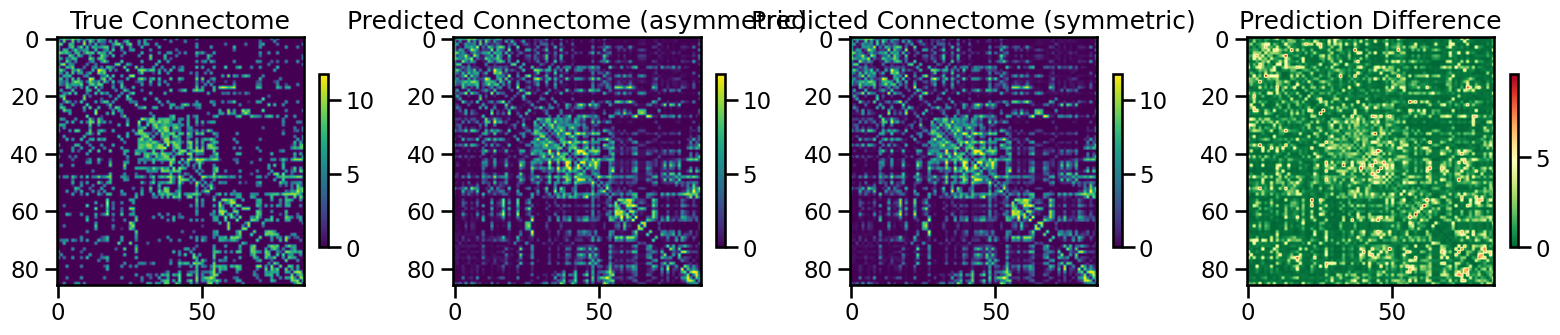

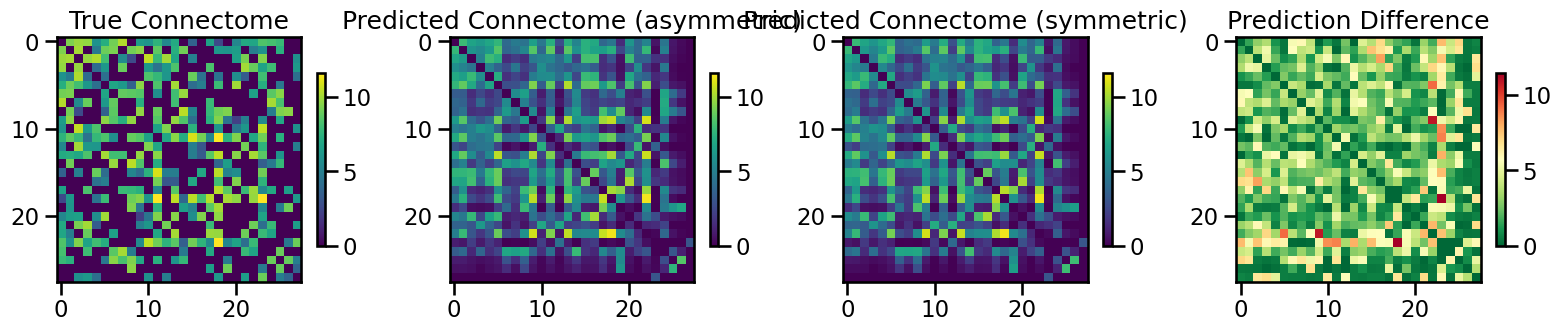

  self.comm = Comm(**args)




TRAIN METRICS: {'mse': 3.699139393704977, 'mae': 1.1496376820505163, 'r2': 0.661697148216068, 'pearson_corr': 0.8179935168906146, 'geodesic_distance': 10.218095393499185}
TEST METRICS: {'mse': 12.936415776645152, 'mae': 2.8025420422742293, 'r2': 0.17893959775025148, 'pearson_corr': 0.4986548666381937, 'geodesic_distance': 4.860540320806119}
BEST VAL SCORE 0.0
BEST MODEL PARAMS {'input_dim': 10763, 'token_encoder_dim': 40, 'd_model': 64, 'encoder_output_dim': 10, 'use_positional_encoding': False, 'nhead': 4, 'num_layers': 4, 'deep_hidden_dims': [512, 256], 'transformer_dropout': 0.3, 'dropout_rate': 0.3, 'learning_rate': 0.0001, 'weight_decay': 0.0001, 'lambda_reg': 0, 'batch_size': 128, 'epochs': 200}


  from IPython.core.display import HTML, display  # type: ignore



best_val_loss,▁
test_mse_loss,█▇▇▇█▆▅▄▃▂▂▂▂▂▂▂▂▂▂▂▁▁▂▁▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁
test_pearson,▄▃▃▄▄▁▁▄▄▃▅▅▅▆▅▇▇▆▆▆▆▆▇▇▇▇▇▇▇▇▇▇▇▇▇██▇█▇
train_mse_loss,█▇▆▅▄▄▄▄▄▃▃▃▃▃▃▂▂▂▂▂▂▂▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
train_pearson,▁▅▅▆▆▆▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇███████████████████
best_val_loss,0
test_mse_loss,12.95574
test_pearson,0.49472
train_mse_loss,2.78917
train_pearson,0.8652


Final evaluation metrics logged successfully.
CPU Usage: 37.7%
RAM Usage: 12.1%
Available RAM: 1.3T
Total RAM: 1.5T
| ID | GPU | MEM |
------------------
|  0 |  0% |  6% |

 Test fold num: 2 X_train shape: (7310, 21526) Y_train shape: (7310,) X_test shape: (756, 21526) Y_test shape: (756,)
1
3
4
include_coords True
BEST CONFIG {'input_dim': 21526, 'include_coords': True, 'token_encoder_dim': 40, 'd_model': 64, 'use_positional_encoding': False, 'encoder_output_dim': 10, 'nhead': 4, 'num_layers': 4, 'deep_hidden_dims': [512, 256], 'transformer_dropout': 0.3, 'dropout_rate': 0.3, 'learning_rate': 0.0001, 'weight_decay': 0.0001, 'lambda_reg': 0, 'batch_size': 128, 'epochs': 200}
Epoch 5/200, Train Loss: 9.9128, Val Loss: 20.9497
Epoch 5/200, Train Pearson: 0.6072, Val Pearson: 0.5215
Epoch 10/200, Train Loss: 7.9891, Val Loss: 13.0286
Epoch 10/200, Train Pearson: 0.6795, Val Pearson: 0.5362
Epoch 15/200, Train Loss: 6.6096, Val Loss: 13.2659
Epoch 15/200, Train Pearson: 0.7118, Val Pearso

  warnings.warn(*args, **kwargs)  # noqa: B028



Epoch 110/200, Train Loss: 3.4260, Val Loss: 13.4379
Epoch 110/200, Train Pearson: 0.8336, Val Pearson: 0.5469
Epoch 115/200, Train Loss: 3.2420, Val Loss: 11.8943
Epoch 115/200, Train Pearson: 0.8466, Val Pearson: 0.5736
Epoch 120/200, Train Loss: 3.1395, Val Loss: 12.6254
Epoch 120/200, Train Pearson: 0.8513, Val Pearson: 0.5552
Epoch 125/200, Train Loss: 3.1950, Val Loss: 13.6453
Epoch 125/200, Train Pearson: 0.8489, Val Pearson: 0.5427
Epoch 130/200, Train Loss: 3.2701, Val Loss: 14.2903
Epoch 130/200, Train Pearson: 0.8444, Val Pearson: 0.5438
Epoch 135/200, Train Loss: 3.1334, Val Loss: 12.6390
Epoch 135/200, Train Pearson: 0.8515, Val Pearson: 0.5482
Epoch 140/200, Train Loss: 3.0525, Val Loss: 13.7952
Epoch 140/200, Train Pearson: 0.8549, Val Pearson: 0.5326
Epoch 145/200, Train Loss: 2.9907, Val Loss: 12.6033
Epoch 145/200, Train Pearson: 0.8593, Val Pearson: 0.5588
Epoch 150/200, Train Loss: 3.0011, Val Loss: 13.5139
Epoch 150/200, Train Pearson: 0.8590, Val Pearson: 0.5530
E

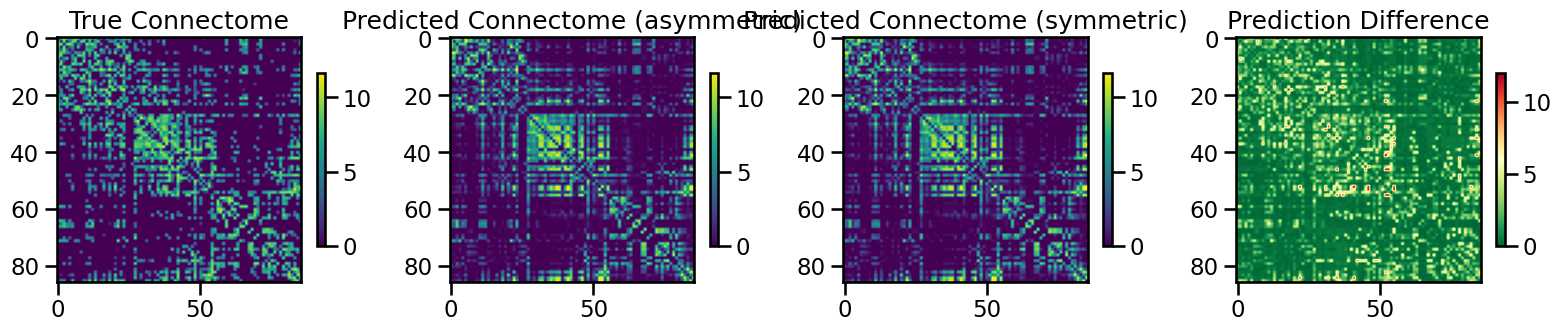

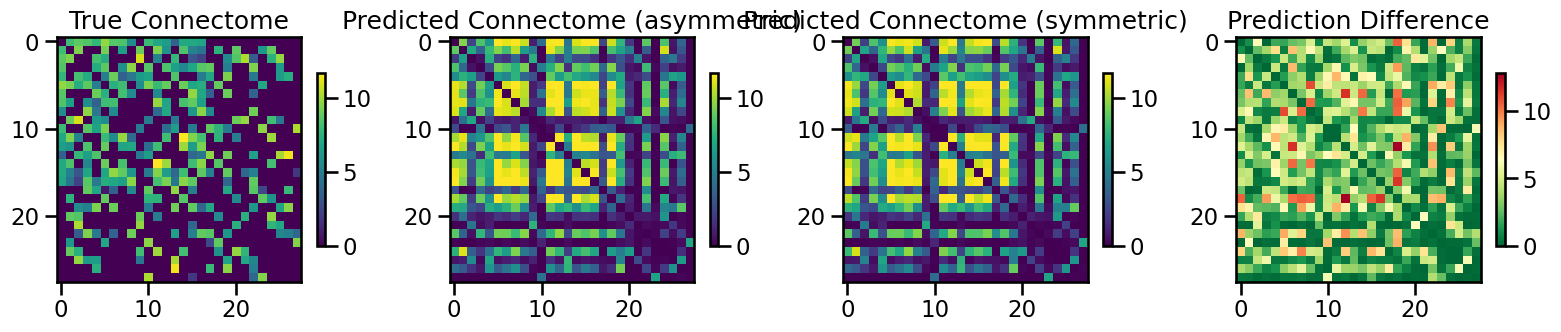

  self.comm = Comm(**args)




TRAIN METRICS: {'mse': 4.4284745654655495, 'mae': 1.1730691716424104, 'r2': 0.60313071573512, 'pearson_corr': 0.7904224481394101, 'geodesic_distance': 10.682640537588956}
TEST METRICS: {'mse': 17.62541879796605, 'mae': 3.074812334891167, 'r2': -0.20341410286007378, 'pearson_corr': 0.5140721777283916, 'geodesic_distance': 7.631993923707275}
BEST VAL SCORE 0.0
BEST MODEL PARAMS {'input_dim': 10763, 'token_encoder_dim': 40, 'd_model': 64, 'encoder_output_dim': 10, 'use_positional_encoding': False, 'nhead': 4, 'num_layers': 4, 'deep_hidden_dims': [512, 256], 'transformer_dropout': 0.3, 'dropout_rate': 0.3, 'learning_rate': 0.0001, 'weight_decay': 0.0001, 'lambda_reg': 0, 'batch_size': 128, 'epochs': 200}


  from IPython.core.display import HTML, display  # type: ignore



best_val_loss,▁
test_mse_loss,█▃▄▃▄▃▂▅▆▄▃▂▅▂▅▅▃▄▂▁▂▂▂▃▂▂▄▄▂▇▅▂▅▄▅▂▆▅▆█
test_pearson,▁▇▇▇▇▆▆▆▇▇▇▇▇▆▆██▆▆▇▇▆▇▇▇▇▇▇▆▇▆▇▇▇▆▇▆▆▇▅
train_mse_loss,█▄▄▃▃▃▃▂▂▂▂▂▂▂▂▂▂▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
train_pearson,▁▅▅▅▅▆▆▆▆▆▆▆▆▆▆▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇███▇██████
best_val_loss,0
test_mse_loss,17.67493
test_pearson,0.51147
train_mse_loss,2.61007
train_pearson,0.88035


Final evaluation metrics logged successfully.
CPU Usage: 21.8%
RAM Usage: 12.1%
Available RAM: 1.3T
Total RAM: 1.5T
| ID | GPU | MEM |
------------------
|  0 |  0% |  6% |

 Test fold num: 3 X_train shape: (7310, 21526) Y_train shape: (7310,) X_test shape: (756, 21526) Y_test shape: (756,)
1
2
4
include_coords True
BEST CONFIG {'input_dim': 21526, 'include_coords': True, 'token_encoder_dim': 40, 'd_model': 64, 'use_positional_encoding': False, 'encoder_output_dim': 10, 'nhead': 4, 'num_layers': 4, 'deep_hidden_dims': [512, 256], 'transformer_dropout': 0.3, 'dropout_rate': 0.3, 'learning_rate': 0.0001, 'weight_decay': 0.0001, 'lambda_reg': 0, 'batch_size': 128, 'epochs': 200}
Epoch 5/200, Train Loss: 9.5503, Val Loss: 27.7056
Epoch 5/200, Train Pearson: 0.5660, Val Pearson: 0.3255
Epoch 10/200, Train Loss: 7.4940, Val Loss: 23.1205
Epoch 10/200, Train Pearson: 0.6543, Val Pearson: 0.5269


In [ ]:
# Run simulation
single_sim_run(
              cv_type='spatial',
              random_seed=1,
              model_type='shared_transformer',
              feature_type=[{'transcriptome': None},
                            {'euclidean': None}],
              connectome_target='SC',
              use_gpu=True,
              use_shared_regions=False,
              test_shared_regions=False,
              omit_subcortical=False,
              parcellation='S100',
              gene_list='0.2',
              hemisphere='both',
              search_method=('wandb', 'mse', 3),
              save_sim=False,
              track_wandb=True,
              skip_cv=True
              )

Number of components for 95% variance PCA: 34
X shape: (114, 10760)
X_pca shape: (114, 34)
Y_sc shape: (114, 114)
Y_sc_spectralL shape: (114, 113)
Y_sc_spectralA shape: (114, 114)
Y_fc shape: (114, 114)
Coordinates shape: (114, 3)
Y shape (114, 114)
Network coverage: 100.0% of regions
Network sizes: [28, 28, 28, 30]
feature_name:  euclidean
processing_type:  None
features ['euclidean']
X shape (114, 3)

 Test fold num: 1 X_train shape: (7310, 6) Y_train shape: (7310,) X_test shape: (756, 6) Y_test shape: (756,)
2
3
4
BEST CONFIG {'hidden_dims': [512, 256, 128], 'learning_rate': 0.0001, 'batch_size': 256, 'dropout_rate': 0.15, 'weight_decay': 0.0001, 'input_dim': 6, 'epochs': 150}
Number of learnable parameters in MLP: 169729


  warnings.warn(



Epoch 5/150, Train Loss: 0.1980, Val Loss: 0.3776
Epoch 5/150, Train Pearson: 0.3817, Val Pearson: 0.3400
Epoch 10/150, Train Loss: 0.1925, Val Loss: 0.3776
Epoch 10/150, Train Pearson: 0.4288, Val Pearson: 0.3662
Epoch 15/150, Train Loss: 0.1866, Val Loss: 0.3719
Epoch 15/150, Train Pearson: 0.4519, Val Pearson: 0.4023
Epoch 20/150, Train Loss: 0.1813, Val Loss: 0.3721
Epoch 20/150, Train Pearson: 0.4686, Val Pearson: 0.4024
Epoch 25/150, Train Loss: 0.1753, Val Loss: 0.3717
Epoch 25/150, Train Pearson: 0.4901, Val Pearson: 0.3961
Epoch 30/150, Train Loss: 0.1677, Val Loss: 0.3700
Epoch 30/150, Train Pearson: 0.5484, Val Pearson: 0.3729
Epoch 35/150, Train Loss: 0.1602, Val Loss: 0.3460
Epoch 35/150, Train Pearson: 0.5967, Val Pearson: 0.4673
Epoch 40/150, Train Loss: 0.1493, Val Loss: 0.3492
Epoch 40/150, Train Pearson: 0.6478, Val Pearson: 0.4902
Epoch 45/150, Train Loss: 0.1390, Val Loss: 0.3352
Epoch 45/150, Train Pearson: 0.6787, Val Pearson: 0.5045
Epoch 50/150, Train Loss: 0.13

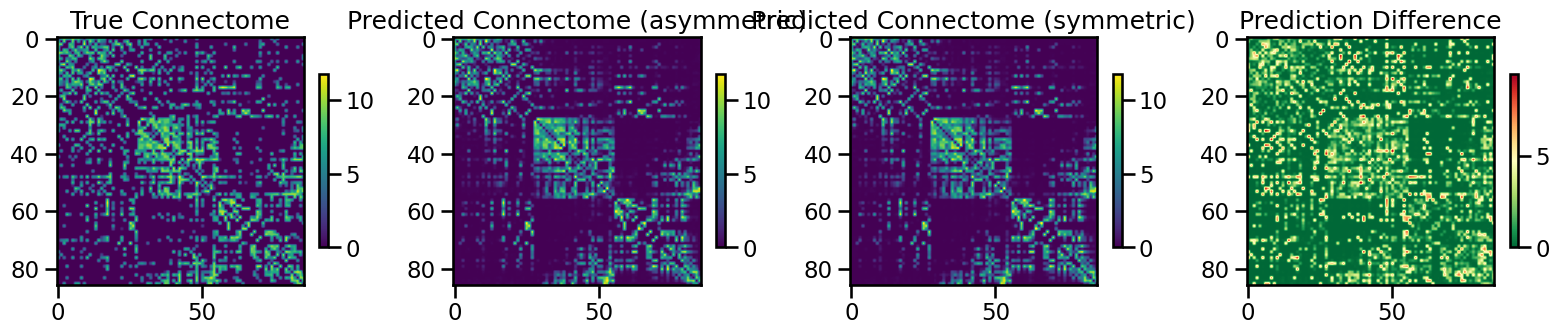

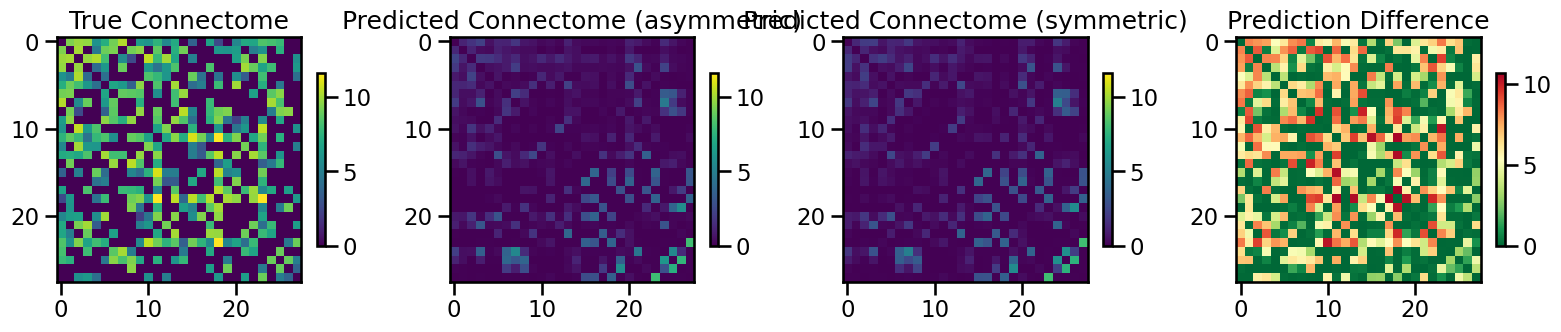

  self.comm = Comm(**args)




TRAIN METRICS: {'mse': 4.615446875078774, 'mae': 1.0445864481457139, 'r2': 0.57789672842458, 'pearson_corr': 0.7771240218190852, 'geodesic_distance': 10.30013947355723}
TEST METRICS: {'mse': 23.27532895877225, 'mae': 3.4293284505593165, 'r2': -0.4772601072304701, 'pearson_corr': 0.4532439068221174, 'geodesic_distance': 10.595573161991705}
BEST VAL SCORE 0.0
BEST MODEL PARAMS {'input_dim': 6, 'hidden_dims': [512, 256, 128], 'dropout_rate': 0.15, 'learning_rate': 0.0001, 'weight_decay': 0.0001, 'batch_size': 256, 'epochs': 150, 'device': 'cuda'}


  from IPython.core.display import HTML, display  # type: ignore



best_val_loss,▁
test_mse_loss,██▇▇▇█▇▇▆▄▃▃▃▁▂▂▃▂▄▃▄▄▄▄▄▃▄▃▄▃▄▄▄▄▄▄▄▄▄▄
test_pearson,▁▃▄▅▄▅▅▅▅▅█████████▇▇▆▇▆▆▆▆▆▆▆▆▆▆▆▆▆▆▆▆▆
train_mse_loss,██▇▇▇▇▆▆▆▆▅▅▄▄▄▃▃▂▃▃▂▂▂▁▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
train_pearson,▁▂▂▂▂▃▃▃▃▄▆▆▇▇▇▇▇▇██████████████████████
best_val_loss,0
test_mse_loss,0.33788
test_pearson,0.45385
train_mse_loss,0.11817
train_pearson,0.74133


Final evaluation metrics logged successfully.


  warnings.warn(



CPU Usage: 21.6%
RAM Usage: 11.7%
Available RAM: 1.3T
Total RAM: 1.5T
| ID | GPU | MEM |
------------------
|  0 |  0% | 14% |

 Test fold num: 2 X_train shape: (7310, 6) Y_train shape: (7310,) X_test shape: (756, 6) Y_test shape: (756,)
1
3
4
BEST CONFIG {'hidden_dims': [512, 256, 128], 'learning_rate': 0.0001, 'batch_size': 256, 'dropout_rate': 0.15, 'weight_decay': 0.0001, 'input_dim': 6, 'epochs': 150}
Number of learnable parameters in MLP: 169729
Epoch 5/150, Train Loss: 0.2013, Val Loss: 0.3152
Epoch 5/150, Train Pearson: 0.4842, Val Pearson: 0.2638
Epoch 10/150, Train Loss: 0.1954, Val Loss: 0.3029
Epoch 10/150, Train Pearson: 0.5298, Val Pearson: 0.4764
Epoch 15/150, Train Loss: 0.1882, Val Loss: 0.2995
Epoch 15/150, Train Pearson: 0.5515, Val Pearson: 0.5040
Epoch 20/150, Train Loss: 0.1793, Val Loss: 0.2916
Epoch 20/150, Train Pearson: 0.5624, Val Pearson: 0.5399
Epoch 25/150, Train Loss: 0.1717, Val Loss: 0.2875
Epoch 25/150, Train Pearson: 0.5772, Val Pearson: 0.5612
Epoch 

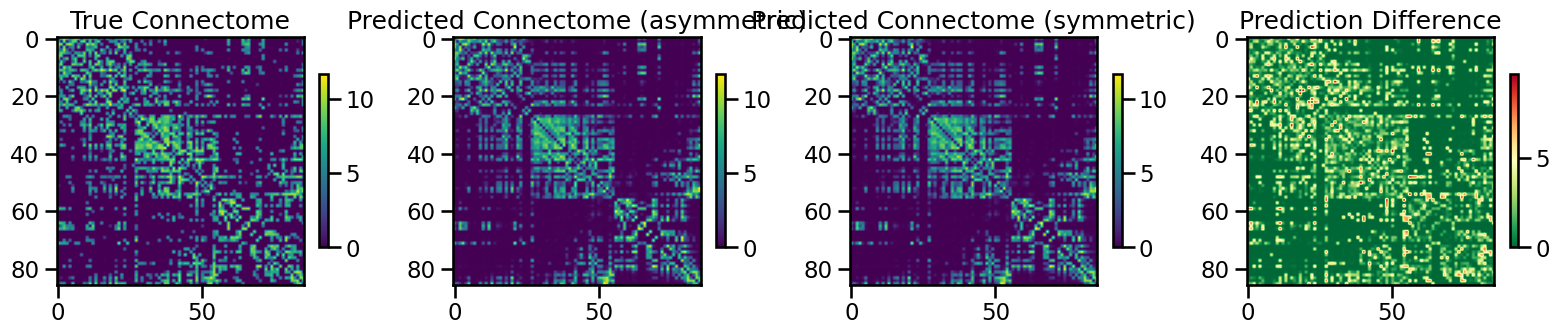

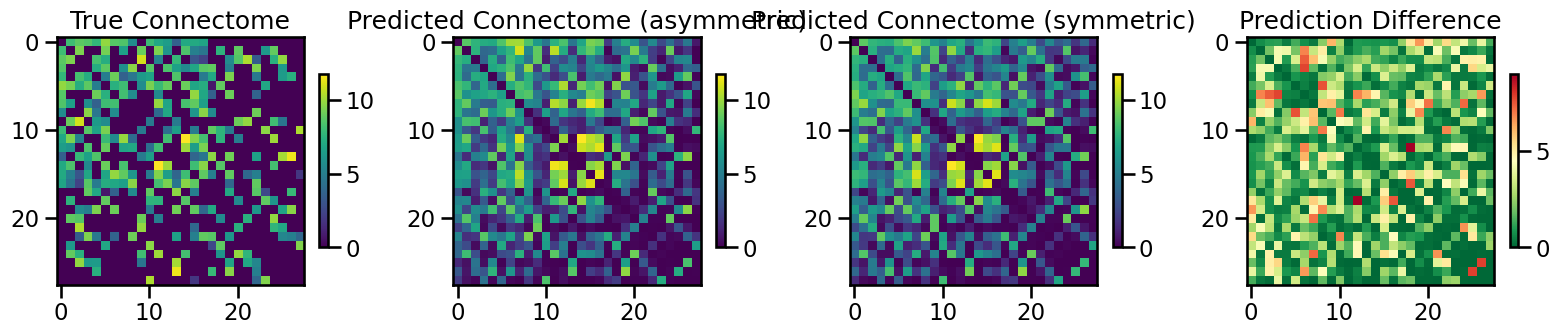

  self.comm = Comm(**args)




TRAIN METRICS: {'mse': 4.319449094001647, 'mae': 1.0270024657675942, 'r2': 0.6129013173693583, 'pearson_corr': 0.7940123014562859, 'geodesic_distance': 9.962464115741893}
TEST METRICS: {'mse': 7.7421346013776375, 'mae': 1.9940171953623573, 'r2': 0.47138878954672137, 'pearson_corr': 0.7259560639282244, 'geodesic_distance': 6.982430198915684}
BEST VAL SCORE 0.0
BEST MODEL PARAMS {'input_dim': 6, 'hidden_dims': [512, 256, 128], 'dropout_rate': 0.15, 'learning_rate': 0.0001, 'weight_decay': 0.0001, 'batch_size': 256, 'epochs': 150, 'device': 'cuda'}


  from IPython.core.display import HTML, display  # type: ignore



best_val_loss,▁
test_mse_loss,████▇▇▇▇▆▅▃▂▃▃▂▁▁▁▁▁▁▁▁▁▁▂▁▁▂▁▁▁▁▂▂▁▁▁▁▂
test_pearson,▂▁▄▅▅▆▆▆▆▇▇▇▇███████████████████████████
train_mse_loss,█▇▇▇▇▇▆▆▅▅▄▄▄▃▃▂▂▂▂▂▂▂▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
train_pearson,▁▁▂▂▂▃▃▄▄▄▅▅▆▆▆▆▆▇▇▇▇▇▇▇▇▇██████████████
best_val_loss,0
test_mse_loss,0.19461
test_pearson,0.727
train_mse_loss,0.11738
train_pearson,0.76017


Final evaluation metrics logged successfully.


  warnings.warn(



CPU Usage: 21.8%
RAM Usage: 11.8%
Available RAM: 1.3T
Total RAM: 1.5T
| ID | GPU | MEM |
------------------
|  0 |  0% | 14% |

 Test fold num: 3 X_train shape: (7310, 6) Y_train shape: (7310,) X_test shape: (756, 6) Y_test shape: (756,)
1
2
4
BEST CONFIG {'hidden_dims': [512, 256, 128], 'learning_rate': 0.0001, 'batch_size': 256, 'dropout_rate': 0.15, 'weight_decay': 0.0001, 'input_dim': 6, 'epochs': 150}
Number of learnable parameters in MLP: 169729
Epoch 5/150, Train Loss: 0.1858, Val Loss: 0.4135
Epoch 5/150, Train Pearson: 0.3832, Val Pearson: 0.2957
Epoch 10/150, Train Loss: 0.1795, Val Loss: 0.4147
Epoch 10/150, Train Pearson: 0.4315, Val Pearson: 0.3376
Epoch 15/150, Train Loss: 0.1763, Val Loss: 0.4094
Epoch 15/150, Train Pearson: 0.4716, Val Pearson: 0.3334
Epoch 20/150, Train Loss: 0.1709, Val Loss: 0.4049
Epoch 20/150, Train Pearson: 0.5160, Val Pearson: 0.3732
Epoch 25/150, Train Loss: 0.1661, Val Loss: 0.3972
Epoch 25/150, Train Pearson: 0.5374, Val Pearson: 0.4139
Epoch 

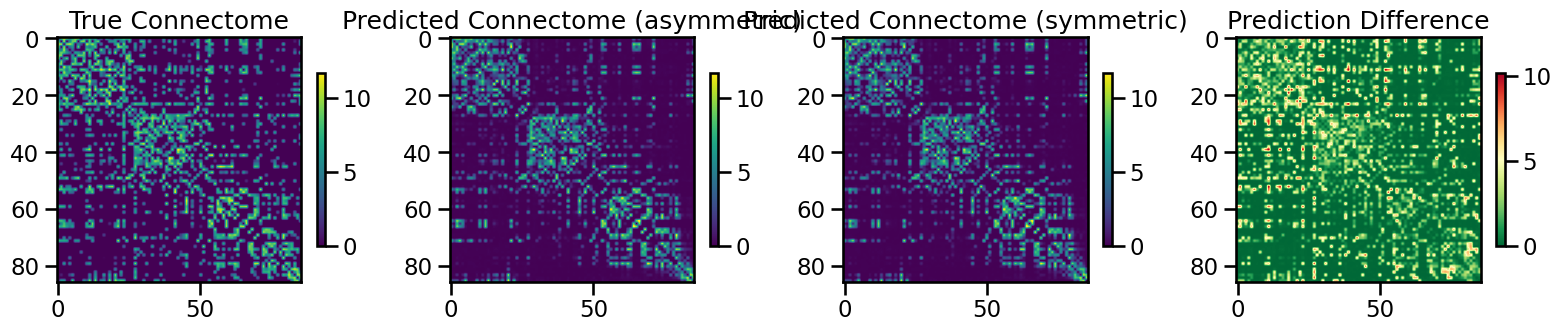

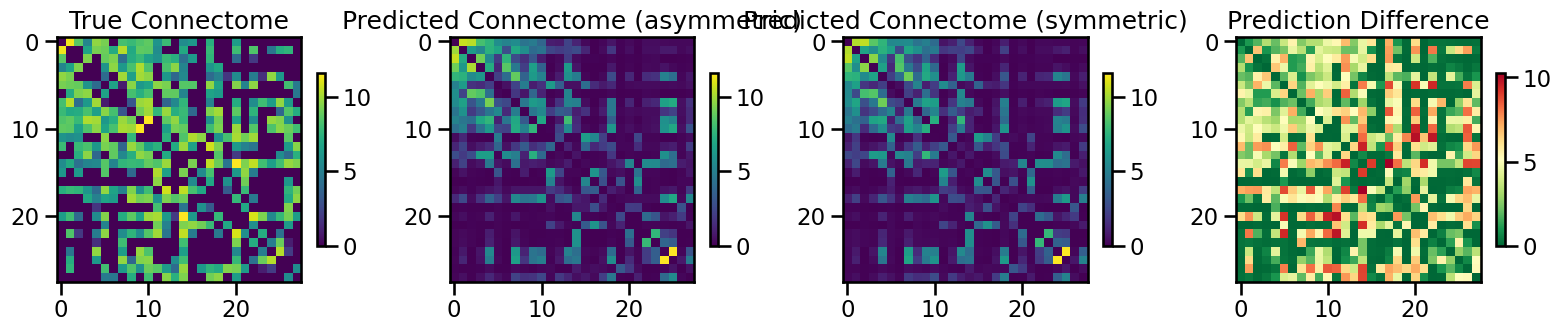

  self.comm = Comm(**args)




TRAIN METRICS: {'mse': 4.722565614854976, 'mae': 1.037525421572525, 'r2': 0.5414776836541465, 'pearson_corr': 0.7580228513081386, 'geodesic_distance': 9.238846038823812}
TEST METRICS: {'mse': 18.191740743283454, 'mae': 3.145129024579397, 'r2': -0.13934131762802404, 'pearson_corr': 0.5059748143796312, 'geodesic_distance': 7.5584533948384225}
BEST VAL SCORE 0.0
BEST MODEL PARAMS {'input_dim': 6, 'hidden_dims': [512, 256, 128], 'dropout_rate': 0.15, 'learning_rate': 0.0001, 'weight_decay': 0.0001, 'batch_size': 256, 'epochs': 150, 'device': 'cuda'}


  from IPython.core.display import HTML, display  # type: ignore



best_val_loss,▁
test_mse_loss,██████▇▇▇▇▇▆▅▄▃▃▂▃▂▂▂▁▁▂▁▁▂▂▂▁▂▁▁▁▂▁▂▁▂▂
test_pearson,▁▁▂▂▂▆████▇▇█▇▇▇▇▇██▇▇▇██▇▇████▇▇█▇▇▇██▇
train_mse_loss,███▇▇▇▇▇▆▆▆▆▅▄▄▂▂▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
train_pearson,▁▂▂▂▃▄▆▆▆▆▇▇▇█▇█████████████████████████
best_val_loss,0
test_mse_loss,0.30971
test_pearson,0.50452
train_mse_loss,0.11553
train_pearson,0.73016


Final evaluation metrics logged successfully.


  warnings.warn(



CPU Usage: 22.1%
RAM Usage: 11.9%
Available RAM: 1.3T
Total RAM: 1.5T
| ID | GPU | MEM |
------------------
|  0 |  0% | 14% |

 Test fold num: 4 X_train shape: (6972, 6) Y_train shape: (6972,) X_test shape: (870, 6) Y_test shape: (870,)
1
2
3
BEST CONFIG {'hidden_dims': [512, 256, 128], 'learning_rate': 0.0001, 'batch_size': 256, 'dropout_rate': 0.15, 'weight_decay': 0.0001, 'input_dim': 6, 'epochs': 150}
Number of learnable parameters in MLP: 169729
Epoch 5/150, Train Loss: 0.2260, Val Loss: 0.2737
Epoch 5/150, Train Pearson: 0.3909, Val Pearson: 0.2454
Epoch 10/150, Train Loss: 0.2216, Val Loss: 0.2650
Epoch 10/150, Train Pearson: 0.4610, Val Pearson: 0.3221
Epoch 15/150, Train Loss: 0.2159, Val Loss: 0.2489
Epoch 15/150, Train Pearson: 0.4814, Val Pearson: 0.4302
Epoch 20/150, Train Loss: 0.2120, Val Loss: 0.2810
Epoch 20/150, Train Pearson: 0.4981, Val Pearson: 0.3330
Epoch 25/150, Train Loss: 0.2015, Val Loss: 0.2652
Epoch 25/150, Train Pearson: 0.5105, Val Pearson: 0.3675
Epoch 

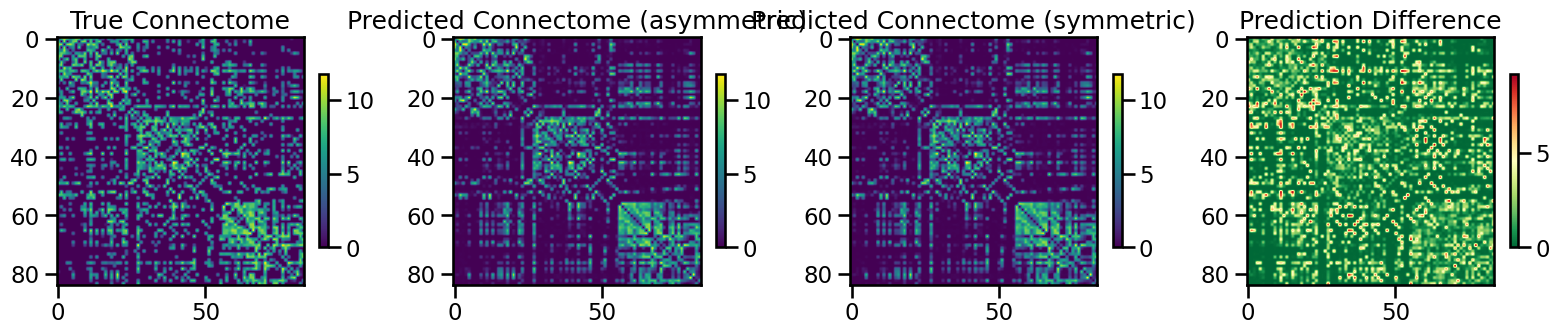

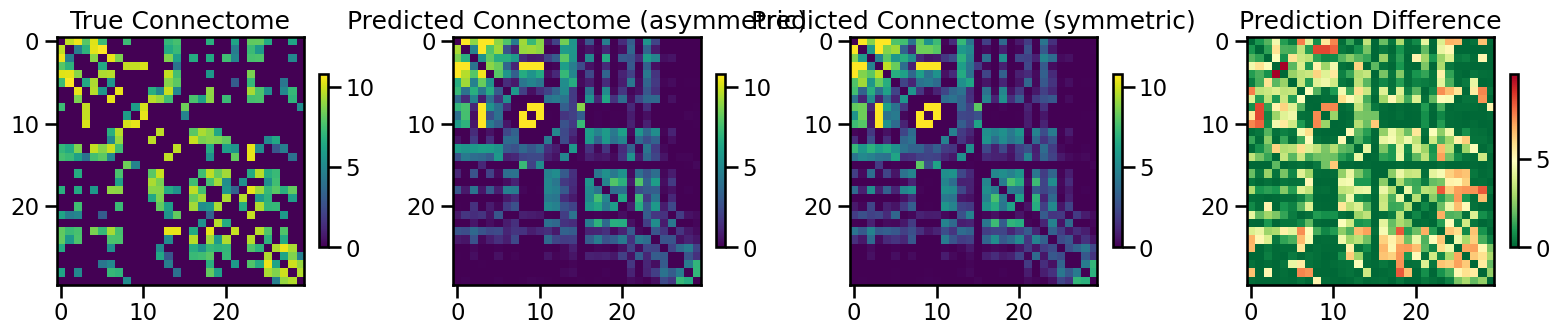

  self.comm = Comm(**args)




TRAIN METRICS: {'mse': 5.135853980172853, 'mae': 1.1915806379252125, 'r2': 0.5646756602559974, 'pearson_corr': 0.7698483871944112, 'geodesic_distance': 9.598423242569112}
TEST METRICS: {'mse': 10.101856156048527, 'mae': 2.140655039252289, 'r2': 0.2906232978837834, 'pearson_corr': 0.5900833287014674, 'geodesic_distance': 5.557706252719441}
BEST VAL SCORE 0.0
BEST MODEL PARAMS {'input_dim': 6, 'hidden_dims': [512, 256, 128], 'dropout_rate': 0.15, 'learning_rate': 0.0001, 'weight_decay': 0.0001, 'batch_size': 256, 'epochs': 150, 'device': 'cuda'}


  from IPython.core.display import HTML, display  # type: ignore



best_val_loss,▁
test_mse_loss,█▇▇▇▇▆▆▇█▆▆▆▅▄▄▄▄▂▄▃▂▂▂▂▂▂▁▂▁▂▁▂▂▂▂▂▂▂▁▂
test_pearson,▁▂▄▃▃▁▃▃▁▂▂▃▄▅▃▆▇▇▇█▇▇▇█▇█▇███▇▇█▇█▇▇▇██
train_mse_loss,█▇▇▆▆▅▅▅▄▄▃▃▂▂▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
train_pearson,▁▃▄▄▅▅▅▅▅▅▅▅▆▆▆▇▇▇▇▇▇▇███▇██████████████
best_val_loss,0
test_mse_loss,0.21137
test_pearson,0.59531
train_mse_loss,0.13593
train_pearson,0.72881


Final evaluation metrics logged successfully.
CPU Usage: 21.1%
RAM Usage: 11.8%
Available RAM: 1.3T
Total RAM: 1.5T
| ID | GPU | MEM |
------------------
|  0 |  0% | 14% |


[[{'model_parameters': {'input_dim': 6,
    'hidden_dims': [512, 256, 128],
    'dropout_rate': 0.15,
    'learning_rate': 0.0001,
    'weight_decay': 0.0001,
    'batch_size': 256,
    'epochs': 150,
    'device': 'cuda'},
   'train_metrics': {'mse': 4.615446875078774,
    'mae': 1.0445864481457139,
    'r2': 0.57789672842458,
    'pearson_corr': 0.7771240218190852,
    'geodesic_distance': 10.30013947355723},
   'best_val_score': 0.0,
   'test_metrics': {'mse': 23.27532895877225,
    'mae': 3.4293284505593165,
    'r2': -0.4772601072304701,
    'pearson_corr': 0.4532439068221174,
    'geodesic_distance': 10.595573161991705},
   'y_true': array([ 9.3741,  9.3741,  9.878 ,  9.878 ,  9.7332,  9.7332,  5.9115,
           5.9115,  7.2714,  7.2714,  9.1622,  9.1622, 10.258 , 10.258 ,
           0.    ,  0.    ,  6.4628,  6.4628,  6.0799,  6.0799,  7.5514,
           7.5514,  5.4542,  5.4542,  7.1133,  7.1133,  0.    ,  0.    ,
           3.6407,  3.6407,  0.    ,  0.    ,  6.6911,  6.6911,

In [18]:
# Run simulation
single_sim_run(
              cv_type='spatial',
              random_seed=1,
              model_type='dynamic_mlp',
              feature_type=[
                            {'euclidean': None}],
              connectome_target='SC',
              use_gpu=True,
              use_shared_regions=False,
              test_shared_regions=False,
              omit_subcortical=False,
              parcellation='S100',
              gene_list='0.2',
              hemisphere='both',
              search_method=('wandb', 'mse', 3),
              save_sim=False,
              track_wandb=True,
              skip_cv=True
              )